# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%config IPCompleter.greedy=True
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter
from sklearn.metrics import confusion_matrix
from scipy.sparse import hstack
import plotly.offline as offline
import plotly.graph_objs as go


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]
#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)
# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
86221        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
18308       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
86221           CA 2016-04-27 00:27:00          Grades PreK-2   
18308           UT 2016-04-27 00:31:00             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
86221             Math & Science  Applied Sciences, Health & Life Science   
18308              Special Needs                            Special Needs   

                                      project_title  \
86221  Engineering STEAM into the Primary Classroom   
18308                       Sensory Tools for Focus   

                                         project_essay_1  \
86221  I have been fortunate enough to use the Fairy ...   
18308  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
86221  My students come from a variety of backgrounds...   
18308  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
86221  Each month I try to do several science or STEM...   
18308  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
86221  It is challenging to develop high quality scie...   
18308  When my students are able to calm themselves d...   

                                project_resource_summary  \
86221  My students need STEM kits to learn critical s...   
18308  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
86221                                            53                    1  
18308                                             4                    1

In [5]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [6]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

In [8]:
sorted_cat_dict

{'Warmth': 1388,
 'Care_Hunger': 1388,
 'History_Civics': 5914,
 'Music_Arts': 10293,
 'AppliedLearning': 12135,
 'SpecialNeeds': 13642,
 'Health_Sports': 14223,
 'Math_Science': 41421,
 'Literacy_Language': 52239}

## 1.3 preprocessing of `project_subject_subcategories`

In [9]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [10]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [11]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
86221        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
18308       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
86221           CA 2016-04-27 00:27:00          Grades PreK-2   
18308           UT 2016-04-27 00:31:00             Grades 3-5   

                                      project_title  \
86221  Engineering STEAM into the Primary Classroom   
18308                       Sensory Tools for Focus   

                                         project_essay_1  \
86221  I have been fortunate enough to use the Fairy ...   
18308  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
86221  My students come from a variety of backgrounds...   
18308  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
86221  Each month I try to do several science or STEM...   
18308  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
86221  It is challenging to develop high quality scie...   
18308  When my students are able to calm themselves d...   

                                project_resource_summary  \
86221  My students need STEM kits to learn critical s...   
18308  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
86221                                            53                    1   
18308                                             4                    1   

      clean_categories                 clean_subcategories  \
86221     Math_Science  AppliedSciences Health_LifeScience   
18308     SpecialNeeds                        SpecialNeeds   

                                                   essay  
86221  I have been fortunate enough to use the Fairy ...  
18308  Imagine being 8-9 years old. You're in your th...

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [13]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
len_essay=[]
# tqdm is for printing the status bar
for sentance1 in tqdm(project_data['essay'].values):
    sent= sentance1.lower()
    sent = decontracted(sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())
    len_essay.append(len(sent.split()))
num_essay=np.array(len_essay)    
    

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [01:10<00:00, 1539.92it/s]


In [14]:
# after preprocesing
project_data['essay']=preprocessed_essays
project_data['num_essay']=num_essay
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)
print(project_data['essay'].values[0])

fortunate enough use fairy tale stem kits classroom well stem journals students really enjoyed would love implement lakeshore stem kits classroom next school year provide excellent engaging stem lessons students come variety backgrounds including language socioeconomic status many not lot experience science engineering kits give materials provide exciting opportunities students month try several science stem steam projects would use kits robot help guide science instruction engaging meaningful ways adapt kits current language arts pacing guide already teach material kits like tall tales paul bunyan johnny appleseed following units taught next school year implement kits magnets motion sink vs float robots often get units not know teaching right way using right materials kits give additional ideas strategies lessons prepare students science challenging develop high quality science activities kits give materials need provide students science activities go along curriculum classroom althou

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [15]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
len_project=[]
# tqdm is for printing the status bar
for sentence2 in tqdm(project_data['project_title'].values):
    sent = sentence2.lower()
    sent = decontracted(sent)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
    len_project.append(len(sent.split()))
num_project=np.array(len_project)

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 37107.74it/s]


In [16]:
# after preprocesing
project_data['project_title']=preprocessed_titles
project_data['num_project']=num_project
print(project_data['project_title'][0])

not 21st century learners across ocean


In [17]:
#Preprocessing the project_grade_category
project_grade_category_cleaned=[]
for grade in tqdm(project_data['project_grade_category'].values):
    grade = grade.replace(' ', '_')
    grade = grade.replace('-', '_')
    project_grade_category_cleaned.append(grade)
project_data['Project_grade_category']=project_grade_category_cleaned

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 578357.47it/s]


In [18]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

In [19]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:00          Grades PreK-2   
1           UT 2016-04-27 00:31:00             Grades 3-5   

                         project_title  \
0  engineering steam primary classroom   
1                  sensory tools focus   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                            53                    1   
1                                             4                    1   

  clean_categories                 clean_subcategories  \
0     Math_Science  AppliedSciences Health_LifeScience   
1     SpecialNeeds                        SpecialNeeds   

                                               essay  num_essay  num_project  \
0  fortunate enough use fairy tale stem kits clas...        156            4   
1  imagine 8 9 years old third grade classroom se...        159            3   

  Project_grade_category   price  quantity  
0          Grades_PreK_2  725.05         4  
1             Grades_3_5  213.03         8

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [20]:
from sklearn.model_selection import train_test_split
# split the data set into train and test respectively 80% and 20%
y=project_data['project_is_approved']
project_data.drop(['project_is_approved'],axis=1, inplace=True)
x=project_data
X_temp,X_test,Y_temp,Y_test=train_test_split(x,y,test_size=0.33,random_state=1)
# split the data set into train and cv respectively 60% and 20%  
X_train,X_cv,Y_train,Y_cv=train_test_split(X_temp,Y_temp,test_size=0.33,random_state=1)
print("Shape of Train data set X={} Y={}".format(X_train.shape,Y_train.shape))
print("Shape of Test data set X={} Y={}".format(X_test.shape,Y_test.shape))
print("Shape of CV data set X={} Y={}".format(X_cv.shape,Y_cv.shape))

Shape of Train data set X=(49041, 18) Y=(49041,)
Shape of Test data set X=(36052, 18) Y=(36052,)
Shape of CV data set X=(24155, 18) Y=(24155,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

###  Vectorizing Categorical data

In [21]:
#Response coding

def get_prob(x_columns,x_column_name,y,all_unique_values):
    i=0
    prob_temp=0.
    prob_1=[]
    prob_0=[]
    new_column_1=x_column_name+'_approved' #if column is clean_categories then new_column_1=clean_categories_approved
    new_column_0=x_column_name+'_not_approved'#if column is clean_categories then new_column_0=clean_categories_not_approved
    #all_unique_values=x_columns[x_column_name].unique()
    for unique in tqdm(all_unique_values):
        total_unique=x_columns[(x_columns[x_column_name]==unique)].count()[0]#getting total count of  unique word in column 
        unique_count=x_columns[(x_columns[x_column_name]==unique)&(y==1)].count()[0]#getting count of  unique word in column where class label is 1
        prob_temp=round((unique_count/total_unique),3)#Calculating the probability of unique word where class label is 1 
        prob_1.append(prob_temp)
        prob_0.append(round((1-prob_temp),3))#Calculating the probability of unique word where class label is 0
    d={'Name':all_unique_values,"Approved":prob_1,"Not_approved":prob_0}
    df = pd.DataFrame(data=d)
    print(df[0:2])
    for unique in all_unique_values:
        x_columns.loc[(x_columns[x_column_name]==unique),new_column_1]=df.loc[(df["Name"]==unique),"Approved"][i]#Updating the probabilities to the dataset 
        x_columns.loc[(x_columns[x_column_name]==unique),new_column_0]=df.loc[(df["Name"]==unique),"Not_approved"][i]#Updating the probabilities to the dataset 
        i=i+1 
    return(x_columns[new_column_1],x_columns[new_column_0])

In [22]:
#Response coding
# clean_categories
all_unique_values=X_train["clean_categories"].unique()# getting all unique data from column
tr_categories_approved,tr_categories_not_approved = get_prob(X_train,"clean_categories",Y_train,all_unique_values)
cv_categories_approved,cv_categories_not_approved = get_prob(X_cv,"clean_categories",Y_cv,all_unique_values)
te_categories_approved,te_categories_not_approved = get_prob(X_test,"clean_categories",Y_test,all_unique_values)
tr_categories_approved=np.array(tr_categories_approved).reshape(-1,1)
tr_categories_not_approved=np.array(tr_categories_not_approved).reshape(-1,1)
cv_categories_approved=np.array(cv_categories_approved).reshape(-1,1)
cv_categories_not_approved=np.array(cv_categories_not_approved).reshape(-1,1)
te_categories_approved=np.array(te_categories_approved).reshape(-1,1)
te_categories_not_approved=np.array(te_categories_not_approved).reshape(-1,1)


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 40.55it/s]


            Name  Approved  Not_approved
0  Health_Sports     0.852         0.148
1   Math_Science     0.820         0.180


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 67.60it/s]


            Name  Approved  Not_approved
0  Health_Sports     0.843         0.157
1   Math_Science     0.812         0.188


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:01<00:00, 42.80it/s]


            Name  Approved  Not_approved
0  Health_Sports     0.848         0.152
1   Math_Science     0.824         0.176


In [23]:
#Response coding
# clean_subcategories
all_unique_values=X_train["clean_subcategories"].unique()# getting all unique data from column
tr_sub_categories_approved,tr_sub_categories_not_approved = get_prob(X_train,"clean_subcategories",Y_train,all_unique_values)
cv_sub_categories_approved,cv_sub_categories_not_approved = get_prob(X_cv,"clean_subcategories",Y_cv,all_unique_values)
te_sub_categories_approved,te_sub_categories_not_approved = get_prob(X_test,"clean_subcategories",Y_test,all_unique_values)
tr_sub_categories_approved=np.array(tr_sub_categories_approved).reshape(-1,1)
tr_sub_categories_not_approved=np.array(tr_sub_categories_not_approved).reshape(-1,1)
cv_sub_categories_approved=np.array(cv_sub_categories_approved).reshape(-1,1)
cv_sub_categories_not_approved=np.array(cv_sub_categories_not_approved).reshape(-1,1)
te_sub_categories_approved=np.array(te_sub_categories_approved).reshape(-1,1)
te_sub_categories_not_approved=np.array(te_sub_categories_not_approved).reshape(-1,1)

100%|████████████████████████████████████████████████████████████████████████████████| 377/377 [00:09<00:00, 32.09it/s]


                                 Name  Approved  Not_approved
0  Health_Wellness NutritionEducation     0.857         0.143
1                     AppliedSciences     0.815         0.185


100%|████████████████████████████████████████████████████████████████████████████████| 377/377 [00:05<00:00, 74.77it/s]


                                 Name  Approved  Not_approved
0  Health_Wellness NutritionEducation     0.806         0.194
1                     AppliedSciences     0.819         0.181


100%|████████████████████████████████████████████████████████████████████████████████| 377/377 [00:07<00:00, 52.81it/s]


                                 Name  Approved  Not_approved
0  Health_Wellness NutritionEducation     0.829         0.171
1                     AppliedSciences     0.821         0.179


In [25]:
#Response coding
#teacher_prefix
all_unique_values=X_train["teacher_prefix"].unique()# getting all unique data from column
tr_teacher_prefix_approved,tr_teacher_prefix_not_approved = get_prob(X_train,"teacher_prefix",Y_train,all_unique_values)
cv_teacher_prefix_approved,cv_teacher_prefix_not_approved = get_prob(X_cv,"teacher_prefix",Y_cv,all_unique_values)
te_teacher_prefix_approved,te_teacher_prefix_not_approved = get_prob(X_test,"teacher_prefix",Y_test,all_unique_values)
tr_teacher_prefix_approved=np.array(tr_teacher_prefix_approved).reshape(-1,1)
tr_teacher_prefix_not_approved=np.array(tr_teacher_prefix_not_approved).reshape(-1,1)
cv_teacher_prefix_approved=np.array(cv_teacher_prefix_approved).reshape(-1,1)
cv_teacher_prefix_not_approved=np.array(cv_teacher_prefix_not_approved).reshape(-1,1)
te_teacher_prefix_approved=np.array(te_teacher_prefix_approved).reshape(-1,1)
te_teacher_prefix_not_approved=np.array(te_teacher_prefix_not_approved).reshape(-1,1)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.42it/s]


   Name  Approved  Not_approved
0   Ms.     0.843         0.157
1  Mrs.     0.855         0.145


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 29.96it/s]


   Name  Approved  Not_approved
0  Mrs.     0.854         0.146
1   Ms.     0.843         0.157


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 22.84it/s]


   Name  Approved  Not_approved
0  Mrs.     0.857         0.143
1   Mr.     0.844         0.156


In [26]:
#Response coding
# Project school_state
all_unique_values=X_train["school_state"].unique()# getting all unique data from column
tr_school_state_approved,tr_school_state_not_approved = get_prob(X_train,"school_state",Y_train,all_unique_values)
cv_school_state_approved,cv_school_state_not_approved = get_prob(X_cv,"school_state",Y_cv,all_unique_values)
te_school_state_approved,te_school_state_not_approved = get_prob(X_test,"school_state",Y_test,all_unique_values)
tr_school_state_approved=np.array(tr_school_state_approved).reshape(-1,1)
tr_school_state_not_approved=np.array(tr_school_state_not_approved).reshape(-1,1)
cv_school_state_approved=np.array(cv_school_state_approved).reshape(-1,1)
cv_school_state_not_approved=np.array(cv_school_state_not_approved).reshape(-1,1)
te_school_state_approved=np.array(te_school_state_approved).reshape(-1,1)
te_school_state_not_approved=np.array(te_school_state_not_approved).reshape(-1,1)

100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:01<00:00, 38.17it/s]


  Name  Approved  Not_approved
0   CA     0.858         0.142
1   VA     0.843         0.157


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 86.34it/s]


  Name  Approved  Not_approved
0   TX     0.803         0.197
1   KY     0.873         0.127


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 62.16it/s]


  Name  Approved  Not_approved
0   NJ     0.835         0.165
1   MD     0.853         0.147


In [27]:
#Response coding
# Project project_grade_category
all_unique_values=X_train["project_grade_category"].unique()# getting all unique data from column
tr_project_grade_category_approved,tr_project_grade_category_not_approved = get_prob(X_train,"project_grade_category",Y_train,all_unique_values)
cv_project_grade_category_approved,cv_project_grade_category_not_approved = get_prob(X_cv,"project_grade_category",Y_cv,all_unique_values)
te_project_grade_category_approved,te_project_grade_category_not_approved = get_prob(X_test,"project_grade_category",Y_test,all_unique_values)
tr_project_grade_category_approved=np.array(tr_project_grade_category_approved).reshape(-1,1)
tr_project_grade_category_not_approved=np.array(tr_project_grade_category_not_approved).reshape(-1,1)
cv_project_grade_category_approved=np.array(cv_project_grade_category_approved).reshape(-1,1)
cv_project_grade_category_not_approved=np.array(cv_project_grade_category_not_approved).reshape(-1,1)
te_project_grade_category_approved=np.array(te_project_grade_category_approved).reshape(-1,1)
te_project_grade_category_not_approved=np.array(te_project_grade_category_not_approved).reshape(-1,1)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 12.66it/s]


            Name  Approved  Not_approved
0     Grades 3-5     0.854         0.146
1  Grades PreK-2     0.849         0.151


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 21.29it/s]


            Name  Approved  Not_approved
0     Grades 3-5     0.850         0.150
1  Grades PreK-2     0.849         0.151


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 20.82it/s]


            Name  Approved  Not_approved
0  Grades PreK-2     0.849         0.151
1    Grades 9-12     0.834         0.166


###  standardizing Numerical features

In [28]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(X_train['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
tr_price_standardized=price_scalar.fit_transform(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_price_standardized = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
te_price_standardized = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

Mean : 298.5818657857711, Standard deviation : 363.8573751232583


In [29]:
print("\nShape of matrix after column standardization for 'price'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_price_standardized.shape,cv_price_standardized.shape,te_price_standardized.shape))


Shape of matrix after column standardization for 'price'
Train data-(49041, 1),
CV data	-(24155, 1)
Test data-(36052, 1)


In [30]:
#quantity
quantity_scalar = StandardScaler()
tr_quantity_standardized=quantity_scalar.fit_transform(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_quantity_standardized = quantity_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))
te_quantity_standardized = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'quantity'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_quantity_standardized.shape,cv_quantity_standardized.shape,te_quantity_standardized.shape))

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



Mean : 16.96853653065802, Standard deviation : 26.262737421015874


C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.




Shape of matrix after column standardization for 'quantity'
Train data-(49041, 1),
CV data	-(24155, 1)
Test data-(36052, 1)


In [31]:
#teacher_number_of_previously_posted_projects
teacher_number_of_previously_posted_projects_scalar = StandardScaler()
tr_teacher_number_of_previously_posted_projects_standardized=teacher_number_of_previously_posted_projects_scalar.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {teacher_number_of_previously_posted_projects_scalar.mean_[0]}, Standard deviation : {np.sqrt(teacher_number_of_previously_posted_projects_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
te_teacher_number_of_previously_posted_projects_standardized = teacher_number_of_previously_posted_projects_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'teacher_number_of_previously_posted_projects'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_teacher_number_of_previously_posted_projects_standardized.shape,cv_teacher_number_of_previously_posted_projects_standardized.shape,te_teacher_number_of_previously_posted_projects_standardized.shape))

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



Mean : 11.03756040863767, Standard deviation : 27.38081956899988


C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.




Shape of matrix after column standardization for 'teacher_number_of_previously_posted_projects'
Train data-(49041, 1),
CV data	-(24155, 1)
Test data-(36052, 1)


In [32]:
#Number of words in essay 
num_essay_scalar = StandardScaler()
tr_num_essay_standardized=num_essay_scalar.fit_transform(X_train['num_essay'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {num_essay_scalar.mean_[0]}, Standard deviation : {np.sqrt(num_essay_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_num_essay_standardized = num_essay_scalar.transform(X_cv['num_essay'].values.reshape(-1, 1))
te_num_essay_standardized = num_essay_scalar.transform(X_test['num_essay'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'num_essay'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_num_essay_standardized.shape,cv_num_essay_standardized.shape,te_num_essay_standardized.shape))

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



Mean : 138.1287086315532, Standard deviation : 36.41300099141212


C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.




Shape of matrix after column standardization for 'num_essay'
Train data-(49041, 1),
CV data	-(24155, 1)
Test data-(36052, 1)


In [33]:
#Number of words in essay 
num_project_scalar = StandardScaler()
tr_num_project_standardized=num_project_scalar.fit_transform(X_train['num_project'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {num_project_scalar.mean_[0]}, Standard deviation : {np.sqrt(num_project_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
cv_num_project_standardized = num_project_scalar.transform(X_cv['num_project'].values.reshape(-1, 1))
te_num_project_standardized = num_project_scalar.transform(X_test['num_project'].values.reshape(-1, 1))
print("\nShape of matrix after column standardization for 'num_project'\nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_num_project_standardized.shape,cv_num_project_standardized.shape,te_num_project_standardized.shape))

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.



Mean : 3.6965600212067455, Standard deviation : 1.523906739030445


C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int32 was converted to float64 by StandardScaler.




Shape of matrix after column standardization for 'num_project'
Train data-(49041, 1),
CV data	-(24155, 1)
Test data-(36052, 1)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

### Vectorizing Text data

 <h4><font color='red'>  Bag of Words on `preprocessed_essay`</font></h4>

In [34]:
#Bag of words of Project essays
# We are considering only the words which appeared in at least 10 documents(rows or projects) and max feature is 8000.
#Fitting train data because we need all and transforming  train ,cv and test vector shape should be same.
vectorizer_essays = CountVectorizer(min_df=10,max_features=5000)#max_features=8000
tr_text_bow=vectorizer_essays.fit_transform(X_train['essay']) # fitting train data 

#transforming train,cv and test data

cv_text_bow = vectorizer_essays.transform(X_cv['essay'])
te_text_bow = vectorizer_essays.transform(X_test['essay'])
print("Shape of matrix after one hot encodig \nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_text_bow.shape,cv_text_bow.shape,te_text_bow.shape))

Shape of matrix after one hot encodig 
Train data-(49041, 5000),
CV data	-(24155, 5000)
Test data-(36052, 5000)


In [35]:
print('Some feature names of bag of words of the essays')
print('='*50)
print(vectorizer_essays.get_feature_names()[1000:1020])
print(tr_text_bow.toarray()[0:1])

Some feature names of bag of words of the essays
['consistently', 'consisting', 'consists', 'constant', 'constantly', 'constraints', 'construct', 'constructing', 'construction', 'constructive', 'consumable', 'consumers', 'consuming', 'contact', 'contagious', 'contain', 'contained', 'containers', 'contains', 'contemporary']
[[0 0 0 ... 0 0 0]]


<h4><font color='red'> Bag of Words on `project_title`</font></h4>

In [36]:
#Bag of words project_title
# We are considering only the words which appeared in at least 5 documents(rows or projects) and max number of feature is 5000.
#Fitting train data and transforming  train ,cv and test vector shape should be same.
vectorizer_title = CountVectorizer(min_df=10,max_features=5000)
tr_text_bow_title=vectorizer_title.fit_transform(X_train['project_title'])
cv_text_bow_title = vectorizer_title.transform(X_cv['project_title'])
te_text_bow_title = vectorizer_title.transform(X_test['project_title'])
print("Shape of matrix after one hot encodig \nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_text_bow_title.shape,cv_text_bow_title.shape,te_text_bow_title.shape))

Shape of matrix after one hot encodig 
Train data-(49041, 1978),
CV data	-(24155, 1978)
Test data-(36052, 1978)


In [37]:
print('Some feature names of bag of words of the project title')
print('='*50)
print(vectorizer_title.get_feature_names()[1000:1020])
print(tr_text_bow_title.toarray()[0:2])

Some feature names of bag of words of the project title
['la', 'lab', 'labs', 'lakeshore', 'laminate', 'laminating', 'land', 'language', 'lap', 'laptop', 'laptops', 'large', 'last', 'lead', 'leader', 'leaders', 'leadership', 'leading', 'leads', 'league']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TFIDF vectorizer
<h4><font color='red'>  TFIDF Vectorizer on `preprocessed_essay`</font></h4>

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_essays = TfidfVectorizer(min_df=10,max_features=3000)
#Fitting train data and transforming  train ,cv and test vector shape should be same.
tr_text_tfidf=tfidf_vectorizer_essays.fit_transform(X_train['essay'])
cv_text_tfidf = tfidf_vectorizer_essays.transform(X_cv['essay'])
te_text_tfidf = tfidf_vectorizer_essays.transform(X_test['essay'])
print("Shape of matrix TFIDF Vectorizer on essays \nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_text_tfidf.shape,cv_text_tfidf.shape,te_text_tfidf.shape))

Shape of matrix TFIDF Vectorizer on essays 
Train data-(49041, 3000),
CV data	-(24155, 3000)
Test data-(36052, 3000)


In [39]:
print('Sample of TFIDF Vectorizer on essays')
print('='*50)
print(tr_text_tfidf.toarray()[0:1])
print(tfidf_vectorizer_essays.get_feature_names()[300:310])

Sample of TFIDF Vectorizer on essays
[[0. 0. 0. ... 0. 0. 0.]]
['becoming', 'began', 'begin', 'beginning', 'begins', 'begun', 'behavior', 'behavioral', 'behaviors', 'behind']


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [40]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_title = TfidfVectorizer(min_df=10)
#Fitting train data and transforming  train ,cv and test vector shape should be same.
tr_title_tfidf=tfidf_vectorizer_title.fit_transform(X_train['project_title'])

cv_title_tfidf = tfidf_vectorizer_title.transform(X_cv['project_title'])
te_title_tfidf = tfidf_vectorizer_title.transform(X_test['project_title'])

print("Shape of matrix TFIDF Vectorizer on essays \nTrain data-{},\nCV data\t-{}\nTest data-{}".format(tr_title_tfidf.shape,cv_title_tfidf.shape,te_title_tfidf.shape))

Shape of matrix TFIDF Vectorizer on essays 
Train data-(49041, 1978),
CV data	-(24155, 1978)
Test data-(36052, 1978)


In [41]:
print('Sample of TFIDF Vectorizer on `project_title`')
print('='*50)
print(tr_title_tfidf.toarray()[0:1,180:200])
print(tfidf_vectorizer_title.get_feature_names()[180:200])

Sample of TFIDF Vectorizer on `project_title`
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
['bookshelf', 'bookshelves', 'bookworms', 'boom', 'boost', 'boosting', 'bored', 'boredom', 'boring', 'bot', 'bots', 'bounce', 'bouncing', 'bouncy', 'bound', 'box', 'boxes', 'boys', 'brain', 'brains']


In [42]:
'''# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

'''# ============================
'''Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================'''
'''
words = []
for i in preprocessed_essays:
    words.extend(i.split(' '))

for i in preprocessed_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)'''


'\nwords = []\nfor i in preprocessed_essays:\n    words.extend(i.split(\' \'))\n\nfor i in preprocessed_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(words)\nprint("The number of words that are present in both glove vectors and our coupus",       len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")\n\nwords_courpus = {}\nwords_glove = set(model.keys())\nfor i in words:\n    if i in words_glove:\n        words_courpus[i] = model[i]\nprint("word 2 vec length", len(words_courpus))\n\n\n# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/\n\nimport pickle\nwith open(\'glove_vectors\', \'wb\') as f:\n    pickle.dump(words_courpus, f)'

In [43]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

<h4><font color='red'> Using Pretrained Models: AVG W2V on `preprocessed_essay`</font></h4>

In [44]:
# average Word2Vec
# compute average word2vec for each review.
def AVG_w2v(preprocessed_data):
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_data): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)
    return(avg_w2v_vectors)

#print(len(avg_w2v_vectors))
#print(len(avg_w2v_vectors[1]))


In [45]:
#using above defined function "AVG_w2v" to compute average word2vec for each review in train,cv and test data.
tr_avg_w2v_vectors=AVG_w2v(X_train['essay'])
cv_avg_w2v_vectors=AVG_w2v(X_cv['essay'])
te_avg_w2v_vectors=AVG_w2v(X_test['essay'])

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:12<00:00, 2944.32it/s]


In [46]:
print(len(tr_avg_w2v_vectors),len(cv_avg_w2v_vectors),len(te_avg_w2v_vectors))

49041 24155 36052


<h4><font color='red'> Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [47]:
#using above defined function "AVG_w2v" to compute average word2vec for each review in train,cv and test data.
tr_avg_w2v_vectors_project_title=AVG_w2v(X_train['project_title'])
cv_avg_w2v_vectors_project_title=AVG_w2v(X_cv['project_title'])
te_avg_w2v_vectors_project_title=AVG_w2v(X_test['project_title'])

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 65760.24it/s]


#### <font color='red'>1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [48]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [49]:
# average Word2Vec
# compute average word2vec for each review.
def tfidf_w2v(preprocessed_data,words):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_data): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in words):
                vec = model[word] # getting the vector for each word
                 # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    return(tfidf_w2v_vectors)


In [50]:
#using above defined function "tfidf w2v" to compute average word2vec for each review in train,cv and test data.
words=tfidf_words
tr_tfidf_w2v_vectors=tfidf_w2v(X_train['essay'],words)
cv_tfidf_w2v_vectors=tfidf_w2v(X_cv['essay'],words)
te_tfidf_w2v_vectors=tfidf_w2v(X_test['essay'],words)

100%|███████████████████████████████████████████████████████████████████████████| 36052/36052 [01:23<00:00, 429.74it/s]


<h4><font color='red'>Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [51]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model_project_title = TfidfVectorizer()
tfidf_model_project_title.fit(X_train['project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_project_title.get_feature_names(), list(tfidf_model_project_title.idf_)))
tfidf_project_title_words = set(tfidf_model_project_title.get_feature_names())

In [52]:
#using above defined function "tfidf w2v" to compute average word2vec for each review in train,cv and test data.
words=tfidf_project_title_words
tr_tfidf_w2v_project_title_vectors=tfidf_w2v(X_train['project_title'],words)
cv_tfidf_w2v_project_title_vectors=tfidf_w2v(X_cv['project_title'],words)
te_tfidf_w2v_project_title_vectors=tfidf_w2v(X_test['project_title'],words)

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:03<00:00, 11672.43it/s]


In [53]:
print(len(tr_tfidf_w2v_project_title_vectors),len(cv_tfidf_w2v_project_title_vectors),len(te_tfidf_w2v_project_title_vectors))

49041 24155 36052


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [54]:
%%time
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
#categorical, numerical features + project_title(BOW)
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
tr_X_BOW= hstack((tr_categories_approved,tr_categories_not_approved,tr_sub_categories_approved,tr_sub_categories_not_approved,tr_teacher_prefix_approved,tr_teacher_prefix_not_approved,tr_school_state_approved,tr_school_state_not_approved,tr_project_grade_category_approved,tr_project_grade_category_not_approved,tr_price_standardized,tr_teacher_number_of_previously_posted_projects_standardized,tr_text_bow_title,tr_text_bow)).tocsr()
cv_X_BOW= hstack((cv_categories_approved,cv_categories_not_approved,cv_sub_categories_approved,cv_sub_categories_not_approved,cv_teacher_prefix_approved,cv_teacher_prefix_not_approved,cv_school_state_approved,cv_school_state_not_approved,cv_project_grade_category_approved,cv_project_grade_category_not_approved,cv_price_standardized,cv_teacher_number_of_previously_posted_projects_standardized,cv_text_bow_title,cv_text_bow)).tocsr()
te_X_BOW= hstack((te_categories_approved,te_categories_not_approved,te_sub_categories_approved,te_sub_categories_not_approved,te_teacher_prefix_approved,te_teacher_prefix_not_approved,te_school_state_approved,te_school_state_not_approved,te_project_grade_category_approved,te_project_grade_category_not_approved,te_price_standardized,te_teacher_number_of_previously_posted_projects_standardized,te_text_bow_title,te_text_bow)).tocsr()
tr_X_BOW=tr_X_BOW.toarray()
cv_X_BOW=cv_X_BOW.toarray()
te_X_BOW=te_X_BOW.toarray()
print(tr_X_BOW.shape)
print(cv_X_BOW.shape)
print(te_X_BOW.shape)

(49041, 6990)
(24155, 6990)
(36052, 6990)
Wall time: 5.39 s


In [55]:
%%time
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
#categorical, numerical features + project_title(TFIDF)
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
tr_X_TFIDF= hstack((tr_categories_approved,tr_categories_not_approved,tr_sub_categories_approved,tr_sub_categories_not_approved,tr_teacher_prefix_approved,tr_teacher_prefix_not_approved,tr_school_state_approved,tr_school_state_not_approved,tr_project_grade_category_approved,tr_project_grade_category_not_approved,tr_price_standardized,tr_teacher_number_of_previously_posted_projects_standardized,tr_title_tfidf,tr_text_tfidf))
cv_X_TFIDF= hstack((cv_categories_approved,cv_categories_not_approved,cv_sub_categories_approved,cv_sub_categories_not_approved,cv_teacher_prefix_approved,cv_teacher_prefix_not_approved,cv_school_state_approved,cv_school_state_not_approved,cv_project_grade_category_approved,cv_project_grade_category_not_approved,cv_price_standardized,cv_teacher_number_of_previously_posted_projects_standardized,cv_title_tfidf,cv_text_tfidf))
te_X_TFIDF= hstack((te_categories_approved,te_categories_not_approved,te_sub_categories_approved,te_sub_categories_not_approved,te_teacher_prefix_approved,te_teacher_prefix_not_approved,te_school_state_approved,te_school_state_not_approved,te_project_grade_category_approved,te_project_grade_category_not_approved,te_price_standardized,te_teacher_number_of_previously_posted_projects_standardized,te_title_tfidf,te_text_tfidf))
tr_X_TFIDF=tr_X_TFIDF.toarray()
cv_X_TFIDF=cv_X_TFIDF.toarray()
te_X_TFIDF=te_X_TFIDF.toarray()
print(tr_X_TFIDF.shape)
print(cv_X_TFIDF.shape)
print(te_X_TFIDF.shape)

(49041, 4990)
(24155, 4990)
(36052, 4990)
Wall time: 7.07 s


In [56]:
%%time
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# categorical, numerical features + project_title(AVG W2V)
import scipy
tr_avg_w2v_vectors_project_title =scipy.sparse.csr_matrix(tr_avg_w2v_vectors_project_title)
tr_avg_w2v_vectors=scipy.sparse.csr_matrix(tr_avg_w2v_vectors)
cv_avg_w2v_vectors_project_title =scipy.sparse.csr_matrix(cv_avg_w2v_vectors_project_title)
cv_avg_w2v_vectors=scipy.sparse.csr_matrix(cv_avg_w2v_vectors)
te_avg_w2v_vectors_project_title =scipy.sparse.csr_matrix(te_avg_w2v_vectors_project_title)
te_avg_w2v_vectors=scipy.sparse.csr_matrix(te_avg_w2v_vectors)
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
tr_X_AVG_W2V= hstack((tr_categories_approved,tr_categories_not_approved,tr_sub_categories_approved,tr_sub_categories_not_approved,tr_teacher_prefix_approved,tr_teacher_prefix_not_approved,tr_school_state_approved,tr_school_state_not_approved,tr_project_grade_category_approved,tr_project_grade_category_not_approved,tr_price_standardized,tr_teacher_number_of_previously_posted_projects_standardized,tr_avg_w2v_vectors_project_title,tr_avg_w2v_vectors))
cv_X_AVG_W2V= hstack((cv_categories_approved,cv_categories_not_approved,cv_sub_categories_approved,cv_sub_categories_not_approved,cv_teacher_prefix_approved,cv_teacher_prefix_not_approved,cv_school_state_approved,cv_school_state_not_approved,cv_project_grade_category_approved,cv_project_grade_category_not_approved,cv_price_standardized,cv_teacher_number_of_previously_posted_projects_standardized,cv_avg_w2v_vectors_project_title,cv_avg_w2v_vectors))
te_X_AVG_W2V= hstack((te_categories_approved,te_categories_not_approved,te_sub_categories_approved,te_sub_categories_not_approved,te_teacher_prefix_approved,te_teacher_prefix_not_approved,te_school_state_approved,te_school_state_not_approved,te_project_grade_category_approved,te_project_grade_category_not_approved,te_price_standardized,te_teacher_number_of_previously_posted_projects_standardized,te_avg_w2v_vectors_project_title,te_avg_w2v_vectors))
tr_X_AVG_W2V=tr_X_AVG_W2V.toarray()
cv_X_AVG_W2V=cv_X_AVG_W2V.toarray()
te_X_AVG_W2V=te_X_AVG_W2V.toarray()     
print(tr_X_AVG_W2V.shape,cv_X_AVG_W2V.shape,te_X_AVG_W2V.shape)                     

(49041, 612) (24155, 612) (36052, 612)
Wall time: 16.8 s


In [57]:
%%time
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# categorical, numerical features + project_title(TFIDF W2V)
from scipy.sparse import hstack
tr_tfidf_w2v_vectors=scipy.sparse.csr_matrix(tr_tfidf_w2v_vectors)
tr_tfidf_w2v_project_title_vectors=scipy.sparse.csr_matrix(tr_tfidf_w2v_project_title_vectors)
cv_tfidf_w2v_vectors=scipy.sparse.csr_matrix(cv_tfidf_w2v_vectors)
cv_tfidf_w2v_project_title_vectors=scipy.sparse.csr_matrix(cv_tfidf_w2v_project_title_vectors)
te_tfidf_w2v_vectors=scipy.sparse.csr_matrix(te_tfidf_w2v_vectors)
te_tfidf_w2v_project_title_vectors=scipy.sparse.csr_matrix(te_tfidf_w2v_project_title_vectors)
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
tr_X_tfidf_w2v= hstack((tr_categories_approved,tr_categories_not_approved,tr_sub_categories_approved,tr_sub_categories_not_approved,tr_teacher_prefix_approved,tr_teacher_prefix_not_approved,tr_school_state_approved,tr_school_state_not_approved,tr_project_grade_category_approved,tr_project_grade_category_not_approved,tr_price_standardized,tr_teacher_number_of_previously_posted_projects_standardized,tr_tfidf_w2v_project_title_vectors,tr_tfidf_w2v_vectors))
cv_X_tfidf_w2v= hstack((cv_categories_approved,cv_categories_not_approved,cv_sub_categories_approved,cv_sub_categories_not_approved,cv_teacher_prefix_approved,cv_teacher_prefix_not_approved,cv_school_state_approved,cv_school_state_not_approved,cv_project_grade_category_approved,cv_project_grade_category_not_approved,cv_price_standardized,cv_teacher_number_of_previously_posted_projects_standardized,cv_tfidf_w2v_project_title_vectors,cv_tfidf_w2v_vectors))
te_X_tfidf_w2v= hstack((te_categories_approved,te_categories_not_approved,te_sub_categories_approved,te_sub_categories_not_approved,te_teacher_prefix_approved,te_teacher_prefix_not_approved,te_school_state_approved,te_school_state_not_approved,te_project_grade_category_approved,te_project_grade_category_not_approved,te_price_standardized,te_teacher_number_of_previously_posted_projects_standardized,te_tfidf_w2v_project_title_vectors,te_tfidf_w2v_vectors))
tr_X_tfidf_w2v=tr_X_tfidf_w2v.toarray()
cv_X_tfidf_w2v=cv_X_tfidf_w2v.toarray()
te_X_tfidf_w2v=te_X_tfidf_w2v.toarray()
print(tr_X_tfidf_w2v.shape)
print(cv_X_tfidf_w2v.shape)
print(te_X_tfidf_w2v.shape)

(49041, 612)
(24155, 612)
(36052, 612)
Wall time: 7.78 s


<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

# Hyper paramter tuning to find best diffrent min_samples_split and max_depth

In [58]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
#Drawing confusion matrix
def draw_confusion_matrix(clf,threshold,y_true,y_hat,tpr,fpr,t):
    result=[]
    y_pred=[]

    #finding threshold which maximises the tpr and minimises the fpr
    thr=threshold[np.argmax((tpr*(1-fpr)))]
    
    for probab in y_hat:
    
        if probab >= thr:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    result=confusion_matrix(y_true,y_pred,labels=[0,1])
    df_cm = pd.DataFrame(result,range(2),range(2))
    df_cm.columns = ['Predicted NO','Predicted YES']
    df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})
    plt.figure(figsize = (5,3))
    plt.title(t)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, fmt='g')


In [59]:
#flaten_list() to convert array of list to list that is [array(0.1,2),array(0.2,3)] to [0.1,2,0.2,3]
def flaten_list(list_array):
    flat_list = []
    for sublist in list_array:
        for item in sublist:
            flat_list.append(item)
    return(flat_list)       

In [60]:
#function to plot lines
def plot_curve(train_auc_scores_tmp,validation_auc_scores_tmp,C,title):
    plt.xscale('log')
    plt.plot(C,train_auc_scores_tmp,label="Train curve")
    plt.plot(C,validation_auc_scores_tmp,label="Validation curve")
    plt.scatter(C, train_auc_scores_tmp, label='Train AUC points')
    plt.scatter(C, validation_auc_scores_tmp, label='CV AUC points')
    plt.title(title)
    plt.xlabel("Alpha(α)-hyper paramters")
    plt.ylabel("AUC")
    plt.legend()
    plt.show()

In [61]:
#Function to draw 3-d plot
def plot_3d(x1,y1,z1,x2,y2,z2):
    x1=[5, 10, 100, 500,5, 10, 100, 500,5, 10, 100, 500,5, 10, 100, 500,5, 10, 100, 500,5, 10, 100, 500,5, 10, 100, 500]#min_samples_split
    y1=[1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500,1000,1000,1000,1000]#max_depth
    trace1 = go.Scatter3d(x=x1,y=y1,z=z1,mode='markers', name = 'train')
    trace2 = go.Scatter3d(x=x1,y=y1,z=z2,mode='markers', name = 'Cross validation')
    data = [trace1, trace2]
    #print(data)
    layout = go.Layout(scene = dict(xaxis = dict(title='min_samples_split'),yaxis = dict(title='max_depth'),zaxis = dict(title='AUC'),))
    fig = go.Figure(data=data, layout=layout)
    offline.iplot(fig, filename='3d-scatter-colorscale')

In [62]:
#refered link :https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
def roc_auc_compute(x_train,y_train,x_test_temp,y_test_temp,C,title):
    
    
    depth=C
    min_split=[5, 10, 100, 500]
    i=0
    train_auc_scores=[]
    validation_auc_scores=[]
    train_cv_scores=[]
    validation_cv_scores=[]
    best_cv_auc_scores=0
    train_cv_auc=0
    for c in tqdm(depth):
        for min_sp in min_split:
            class_w={0:0.5,1:0.5}
            parameters = {'max_depth':[c]}
            trained_DT = DecisionTreeClassifier(max_depth=c,class_weight=class_w,min_samples_split =min_sp)
            #trainning model
            trained_DT.fit(x_train,y_train)
            # predict the response on the cross validation
            pradicted_labels=trained_DT.predict_proba(x_test_temp)
            #Calculating validation auc scores
            validation_auc=roc_auc_score(y_test_temp,pradicted_labels[:,1]) #1-roc_auc_score for validation error
            # predict the response on the train and calculating the train auc
            train_auc=roc_auc_score(y_train,trained_DT.predict_proba(x_train)[:,1]) #1-roc_auc_score for train error
             # K-flod cross validation
            gs = GridSearchCV(trained_DT,parameters,cv=3,scoring='roc_auc')
            gs.fit(x_train,y_train)
            train_cv_auc= gs.cv_results_['mean_train_score']
            valid_cv_auc = gs.cv_results_['mean_test_score']
            train_cv_scores.append(gs.cv_results_['mean_train_score'].tolist())
            validation_cv_scores.append(gs.cv_results_['mean_test_score'].tolist() )
            train_auc_scores.append(train_auc)
            validation_auc_scores.append(validation_auc)
            if valid_cv_auc>=best_cv_auc_scores:
                best_cv_auc_scores=valid_cv_auc
            i=i+1
        
    train_cv_scores=flaten_list(train_cv_scores)#convert array of list to list because Scatter3d will accept only list  
    validation_cv_scores=flaten_list(validation_cv_scores)#convert array of list to list because Scatter3d will accept only list 
    print("Train AUC and Validation AUC for diffrent min_samples_split and max_depth for BOW Vectorization")
    plot_3d(min_split,depth,train_auc_scores,min_split,depth,validation_auc_scores)
    print("3-fold cross validation for min_samples_split and max_depth for BOW Vectorization")
    plot_3d(min_split,depth,train_cv_scores,min_split,depth,validation_cv_scores)
    print("Best AUC",best_cv_auc_scores)

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [64]:
%%time
title=["Train AUC and Validation AUC for diffrent Alpha(α) with penalty L1 for BOW Vectorization","3-fold cross validation for diffrent Alpha(α) with penalty L1 for BOW Vectorization","Train AUC and Validation AUC for diffrent Alpha(α) with penalty L2 for BOW Vectorization","3-fold cross validation for diffrent Alpha(α) with penalty L2 for BOW Vectorization"]
roc_auc_compute(tr_X_BOW,Y_train,cv_X_BOW,Y_cv,[1, 5, 10, 50, 100, 500, 1000],title)


100%|████████████████████████████████████████████████████████████████████████████████| 7/7 [8:51:38<00:00, 6280.36s/it]


Train AUC and Validation AUC for diffrent min_samples_split and max_depth for BOW Vectorization


3-fold cross validation for min_samples_split and max_depth for BOW Vectorization


Best AUC [0.63617051]
Wall time: 8h 51min 47s


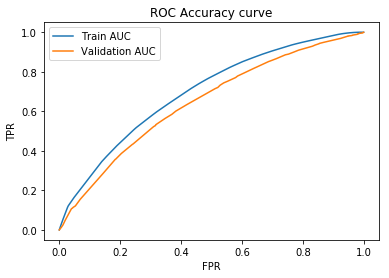

Train AUC = 0.7
Test AUC = 0.65
Wall time: 1min 53s


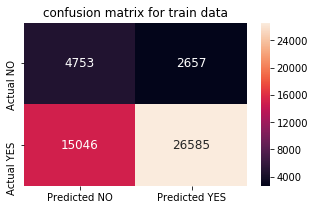

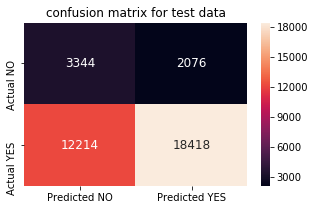

In [69]:
%%time
class_w={0:0.5,1:0.5}
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve, auc
#training model with best lambda(λ) paramter
trained_DT_BOW=DecisionTreeClassifier(max_depth=10,class_weight=class_w,min_samples_split =500)
#trainning model
trained_DT_BOW.fit(tr_X_BOW,Y_train)
# predict the response on the train data
predicted_labels_train=trained_DT_BOW.predict_proba(tr_X_BOW)
predicted_labels_train_temp=trained_DT_BOW.predict(tr_X_BOW)
# predict the response on the test data
predicted_labels_test=trained_DT_BOW.predict_proba(te_X_BOW)
#Calculating FPR and TPR for train and test data
tr_fpr,tr_tpr,tr_threshold=roc_curve(Y_train,predicted_labels_train[:,1])
te_fpr,te_tpr,te_threshold=roc_curve(Y_test,predicted_labels_test[:,1])
#drawing ROC ROC Accuracy curve for test and train data 
plt.plot(tr_fpr,tr_tpr,label="Train AUC")
plt.plot(te_fpr,te_tpr,label="Validation AUC")
plt.title("ROC Accuracy curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()
print("Train AUC =",round(auc(tr_fpr,tr_tpr),2))
print("Test AUC =",round(auc(te_fpr,te_tpr),2))
#drawing confusion matrix for test and train data 
t2="confusion matrix for train data"
draw_confusion_matrix(trained_DT_BOW,tr_threshold,Y_train,predicted_labels_train[:,1],tr_tpr,tr_fpr,t2)
t1="confusion matrix for test data"
draw_confusion_matrix(trained_DT_BOW,tr_threshold,Y_test,predicted_labels_test[:,1],te_tpr,te_fpr,t1)


In [70]:
#Function to get predicted values based on the threshold value 
def get_y_pred(clf,threshold,y_true,y_hat,tpr,fpr):
    result=[]
    y_pred=[]

    #finding threshold which maximises the tpr and minimises the fpr
    thr=threshold[np.argmax((tpr*(1-fpr)))]
    
    for probab in y_hat:
    
        if probab >= thr:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return(y_pred)   

In [71]:
#function to get false positive data
def get_false_positive(x,y,y_hat):
    FP=x[(y==0)&(y_hat==1)]
    return(FP)

In [72]:
#function to print Word Cloud
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 
def get_word_could(FP_data):
    comment_words=''
    stopwords = set(STOPWORDS) 
    for val in tqdm(FP_data):
        
        val = str(val)
        tokens = val.split() 
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        for words in tokens: 
            comment_words = comment_words + words + ' '
    wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords,min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (6, 7), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()    
    

In [81]:
#Fuction to print boxplot
def get_boxplot(price):
    # https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
    plt.boxplot([price])
    plt.title('Box Plots for Cost of an Projects')
    plt.xticks([1],('Price'))
    plt.grid()
    plt.show()
    

In [82]:
#Fucntion to print pdf
def get_pdf(previously_posted_projects):
    plt.figure(figsize=(10,3))
    sns.distplot(previously_posted_projects, hist=False)
    plt.title('Number of previously posted projects by teacher')
    plt.xlabel('Number of previously posted projects')
    plt.legend()
    plt.show()

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

100%|██████████████████████████████████████████████████████████████████████████████| 1950/1950 [01:44<00:00,  7.59it/s]


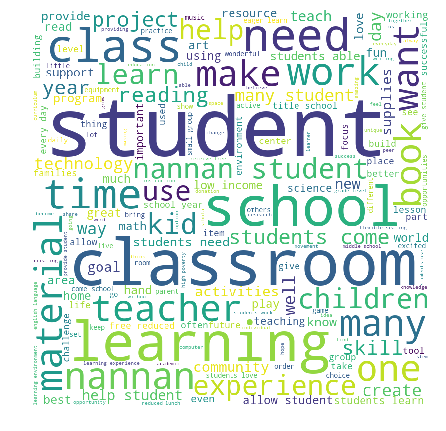

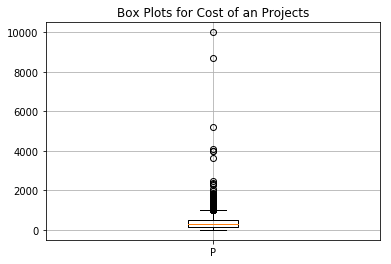

No handles with labels found to put in legend.


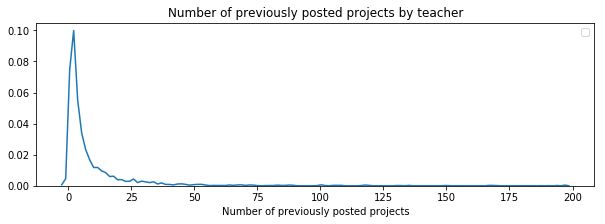

In [85]:
#Y_hat values
y_pred=get_y_pred(trained_DT_BOW,tr_threshold,Y_train,predicted_labels_train[:,1],tr_tpr,tr_fpr)
y_pred=pd.Series(y_pred)
#false positive data
FP=get_false_positive(X_train,Y_train,y_pred)
#print Word Cloud
get_word_could(FP['essay'])
#print boxplot
get_boxplot(FP["price"])
#print pdf
get_pdf(FP["teacher_number_of_previously_posted_projects"])

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [64]:
#adding all set 1 features to BOW_features
def add_features(vectorizer,list_a):
    
    for fea in list(vectorizer.get_feature_names()):
        list_a.append(fea)
    return list_a

    
BOW_features=[]
BOW_features.append("categories_approved")
BOW_features.append("categories_not_approved")
BOW_features.append("sub_categories_approved")
BOW_features.append("sub_categories_not_approved")
BOW_features.append("teacher_prefix_approved")
BOW_features.append("teacher_prefix_not_approved")
BOW_features.append("school_state_approved")
BOW_features.append("school_state_not_approved")
BOW_features.append("project_grade_category_approved")
BOW_features.append("project_grade_category_not_approved")
BOW_features.append("price")
BOW_features.append("teacher_number_of_previously_posted_projects")

add_features(vectorizer_title,BOW_features)
add_features(vectorizer_essays,BOW_features)

print("Len of the BOW features",len(BOW_features))

Len of the BOW features 6990


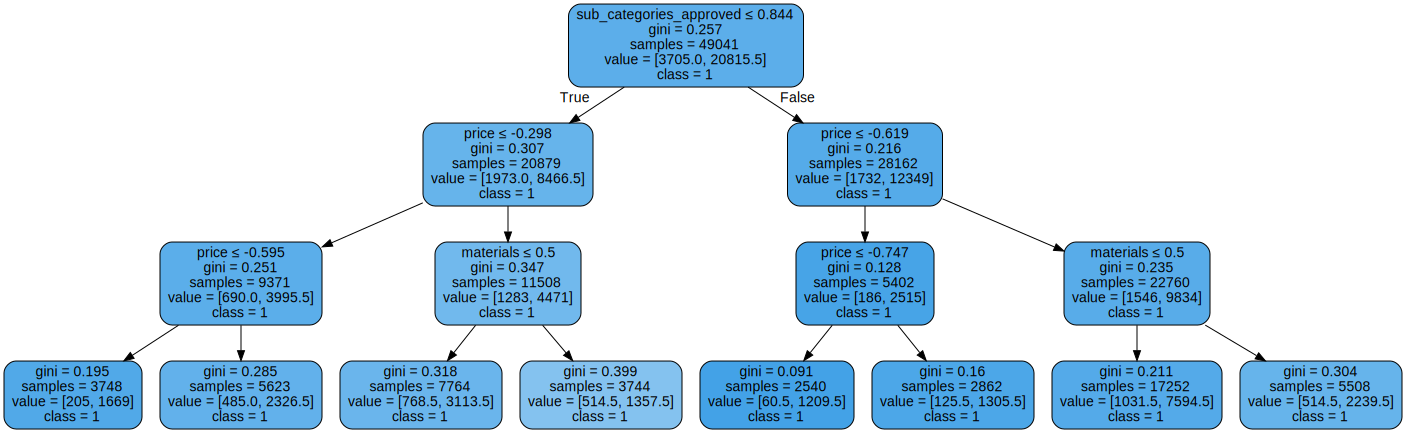

In [118]:
from sklearn import tree
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/''# setting environment path for graphviz 
DT_graph=DecisionTreeClassifier(max_depth=3,class_weight=class_w,min_samples_split =500)
#trainning model
DT_graph.fit(tr_X_BOW,Y_train)
#printing DT
dot_data = tree.export_graphviz(DT_graph, out_file=None,feature_names=BOW_features,class_names=['0','1'],filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [63]:
%%time
title=["Train AUC and Validation AUC for diffrent Alpha(α) with penalty L1 for TFIDF Vectorization","3-fold cross validation for diffrent Alpha(α) with penalty L1 for TFIDF Vectorization","Train AUC and Validation AUC for diffrent Alpha(α) with penalty L2 for TFIDF Vectorization","3-fold cross validation for diffrent Alpha(α) with penalty L2 for TFIDF Vectorization"]
roc_auc_compute(tr_X_TFIDF,Y_train,cv_X_TFIDF,Y_cv,[1, 5, 10, 50, 100, 500, 1000],title)


100%|███████████████████████████████████████████████████████████████████████████████| 7/7 [10:17:14<00:00, 7839.87s/it]


Train AUC and Validation AUC for diffrent min_samples_split and max_depth for BOW Vectorization


3-fold cross validation for min_samples_split and max_depth for BOW Vectorization


Best AUC [0.63029588]
Wall time: 10h 17min 22s


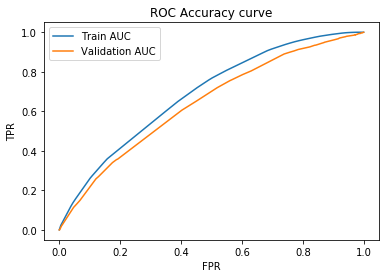

Train AUC = 0.69
Test AUC = 0.64
Wall time: 1min 24s


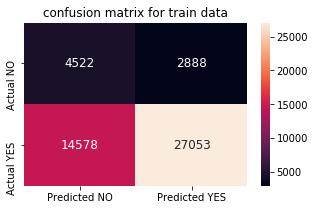

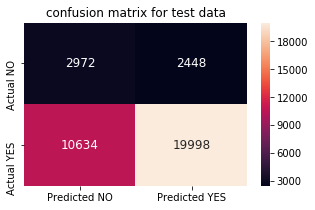

In [76]:
%%time
class_w={0:0.5,1:0.5}
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve, auc
#training model with best lambda(λ) paramter
trained_DT_TFIDF=DecisionTreeClassifier(min_samples_split =500,max_depth=10,class_weight=class_w)
#trainning model
trained_DT_TFIDF.fit(tr_X_TFIDF,Y_train)
# predict the response on the train data
predicted_labels_train=trained_DT_TFIDF.predict_proba(tr_X_TFIDF)
predicted_labels_train_temp=trained_DT_TFIDF.predict(tr_X_TFIDF)
# predict the response on the test data
predicted_labels_test=trained_DT_TFIDF.predict_proba(te_X_TFIDF)
#Calculating FPR and TPR for train and test data
tr_fpr,tr_tpr,tr_threshold=roc_curve(Y_train,predicted_labels_train[:,1])
te_fpr,te_tpr,te_threshold=roc_curve(Y_test,predicted_labels_test[:,1])
#drawing ROC ROC Accuracy curve for test and train data 
plt.plot(tr_fpr,tr_tpr,label="Train AUC")
plt.plot(te_fpr,te_tpr,label="Validation AUC")
plt.title("ROC Accuracy curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()
print("Train AUC =",round(auc(tr_fpr,tr_tpr),2))
print("Test AUC =",round(auc(te_fpr,te_tpr),2))
#drawing confusion matrix for test and train data 
t2="confusion matrix for train data"
draw_confusion_matrix(trained_DT_TFIDF,tr_threshold,Y_train,predicted_labels_train[:,1],tr_tpr,tr_fpr,t2)
t1="confusion matrix for test data"
draw_confusion_matrix(trained_DT_TFIDF,tr_threshold,Y_test,predicted_labels_test[:,1],te_tpr,te_fpr,t1)

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

100%|██████████████████████████████████████████████████████████████████████████████| 1950/1950 [01:57<00:00,  7.35it/s]


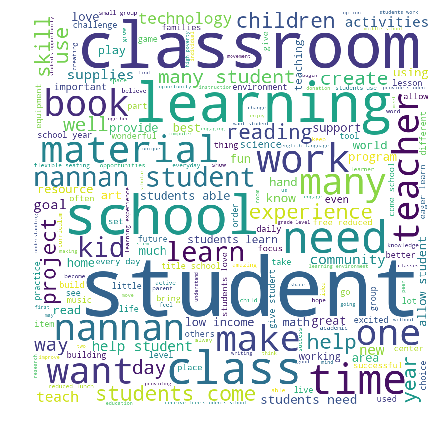

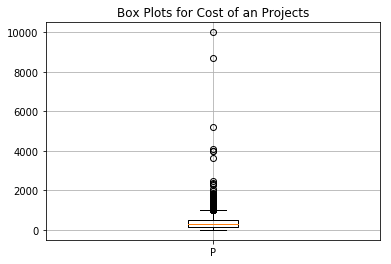

No handles with labels found to put in legend.


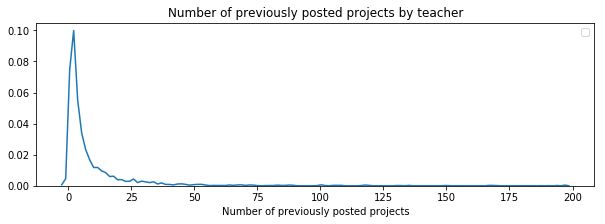

In [86]:
#Y_hat values
y_pred=get_y_pred(trained_DT_TFIDF,tr_threshold,Y_train,predicted_labels_train[:,1],tr_tpr,tr_fpr)
y_pred=pd.Series(y_pred)
#false positive data
FP=get_false_positive(X_train,Y_train,y_pred)
#print Word Cloud
get_word_could(FP['essay'])
#print boxplot
get_boxplot(FP["price"])
#print pdf
get_pdf(FP["teacher_number_of_previously_posted_projects"])

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [112]:
##adding all set 2 features to TFIDF_features
TFIDF_features=[]
TFIDF_features.append("categories_approved")
TFIDF_features.append("categories_not_approved")
TFIDF_features.append("sub_categories_approved")
TFIDF_features.append("sub_categories_not_approved")
TFIDF_features.append("teacher_prefix_approved")
TFIDF_features.append("teacher_prefix_not_approved")
TFIDF_features.append("school_state_approved")
TFIDF_features.append("school_state_not_approved")
TFIDF_features.append("project_grade_category_approved")
TFIDF_features.append("project_grade_category_not_approved")
TFIDF_features.append("price")
TFIDF_features.append("teacher_number_of_previously_posted_projects")
add_features(tfidf_vectorizer_title,TFIDF_features)
add_features(tfidf_vectorizer_essays,TFIDF_features)
print("Len of the TFIDF features",len(TFIDF_features))

Len of the TFIDF features 4990


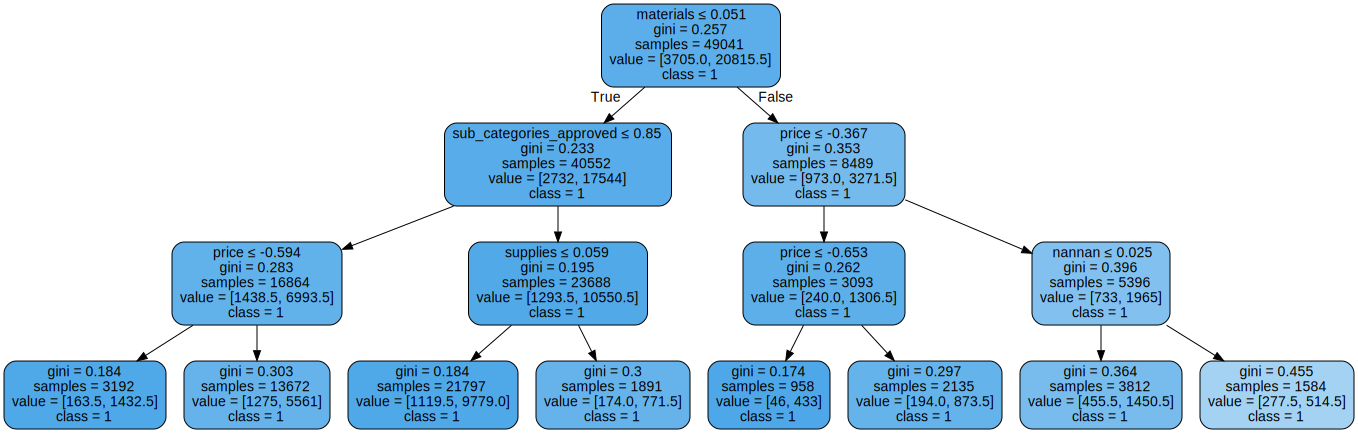

In [120]:
DT_graph=DecisionTreeClassifier(max_depth=3,class_weight=class_w)
#trainning model
DT_graph.fit(tr_X_TFIDF,Y_train)
#printing DT
dot_data = tree.export_graphviz(DT_graph, out_file=None,feature_names=TFIDF_features,class_names=['0','1'],filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [63]:
%%time
title=["Train AUC and Validation AUC for diffrent Alpha(α) with penalty L1 for AVG W2V Vectorization","3-fold cross validation for diffrent Alpha(α) with penalty L1 for AVG W2V Vectorization","Train AUC and Validation AUC for diffrent Alpha(α) with penalty L2 for AVG W2V Vectorization","3-fold cross validation for diffrent Alpha(α) with penalty L2 for AVG W2V Vectorization"]
roc_auc_compute(tr_X_AVG_W2V,Y_train,cv_X_AVG_W2V,Y_cv,[1, 5, 10, 50, 100, 500, 1000],title)

100%|████████████████████████████████████████████████████████████████████████████████| 7/7 [2:20:09<00:00, 1486.41s/it]


Train AUC and Validation AUC for diffrent min_samples_split and max_depth for BOW Vectorization


3-fold cross validation for min_samples_split and max_depth for BOW Vectorization


Best AUC [0.62308116]
Wall time: 2h 20min 15s


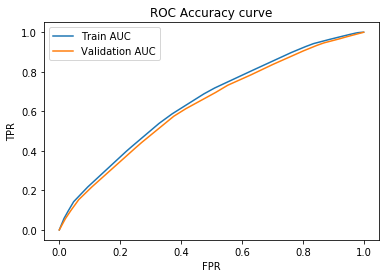

Train AUC = 0.65
Test AUC = 0.63
Wall time: 23.8 s


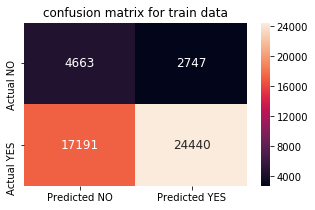

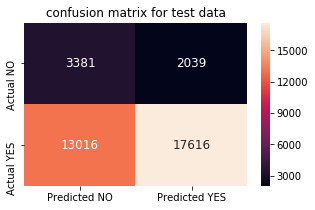

In [78]:
%%time
class_w={0:0.5,1:0.5}
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve, auc
#training model with best lambda(λ) paramter
trained_DT_AVG_W2V=DecisionTreeClassifier(min_samples_split =5,max_depth=5,class_weight=class_w)
#trainning model
trained_DT_AVG_W2V.fit(tr_X_AVG_W2V,Y_train)
# predict the response on the train data
predicted_labels_train=trained_DT_AVG_W2V.predict_proba(tr_X_AVG_W2V)
predicted_labels_train_temp=trained_DT_AVG_W2V.predict(tr_X_AVG_W2V)
# predict the response on the test data
predicted_labels_test=trained_DT_AVG_W2V.predict_proba(te_X_AVG_W2V)
#Calculating FPR and TPR for train and test data
tr_fpr,tr_tpr,tr_threshold=roc_curve(Y_train,predicted_labels_train[:,1])
te_fpr,te_tpr,te_threshold=roc_curve(Y_test,predicted_labels_test[:,1])
#drawing ROC ROC Accuracy curve for test and train data 
plt.plot(tr_fpr,tr_tpr,label="Train AUC")
plt.plot(te_fpr,te_tpr,label="Validation AUC")
plt.title("ROC Accuracy curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()
print("Train AUC =",round(auc(tr_fpr,tr_tpr),2))
print("Test AUC =",round(auc(te_fpr,te_tpr),2))
#drawing confusion matrix for test and train data 
t2="confusion matrix for train data"
draw_confusion_matrix(trained_DT_AVG_W2V,tr_threshold,Y_train,predicted_labels_train[:,1],tr_tpr,tr_fpr,t2)
t1="confusion matrix for test data"
draw_confusion_matrix(trained_DT_AVG_W2V,tr_threshold,Y_test,predicted_labels_test[:,1],te_tpr,te_fpr,t1)

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

100%|██████████████████████████████████████████████████████████████████████████████| 1950/1950 [01:38<00:00,  6.81it/s]


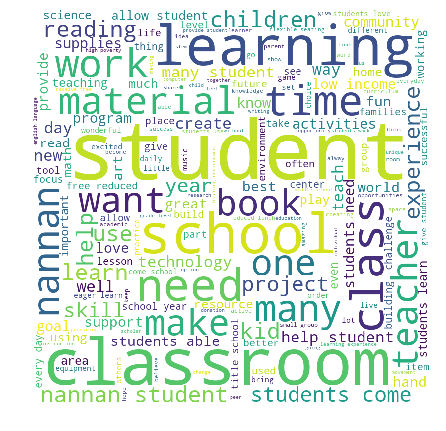

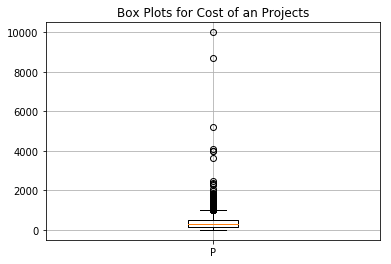

No handles with labels found to put in legend.


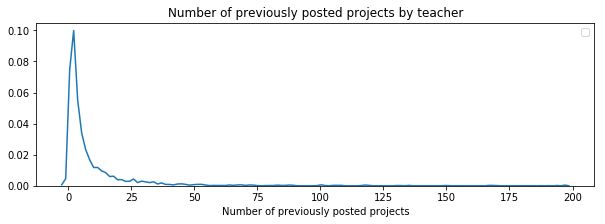

In [87]:
#Y_hat values
y_pred=get_y_pred(trained_DT_AVG_W2V,tr_threshold,Y_train,predicted_labels_train[:,1],tr_tpr,tr_fpr)
y_pred=pd.Series(y_pred)
#false positive data
FP=get_false_positive(X_train,Y_train,y_pred)
#print Word Cloud
get_word_could(FP['essay'])
#print boxplot
get_boxplot(FP["price"])
#print pdf
get_pdf(FP["teacher_number_of_previously_posted_projects"])

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [80]:
%%time
title=["Train AUC and Validation AUC for diffrent Alpha(α) with penalty L1 for TFIDF W2V Vectorization","3-fold cross validation for diffrent Alpha(α) with penalty L1 for TFIDF W2V Vectorization","Train AUC and Validation AUC for diffrent Alpha(α) with penalty L2 for TFIDF W2V Vectorization","3-fold cross validation for diffrent Alpha(α) with penalty L2 for TFIDF W2V Vectorization"]
roc_auc_compute(tr_X_tfidf_w2v,Y_train,cv_X_tfidf_w2v,Y_cv,[1, 5, 10, 50, 100, 500, 1000],title)

100%|████████████████████████████████████████████████████████████████████████████████| 7/7 [2:05:52<00:00, 1326.07s/it]


Train AUC and Validation AUC for diffrent min_samples_split and max_depth for BOW Vectorization


3-fold cross validation for min_samples_split and max_depth for BOW Vectorization


Best AUC [0.62481044]
Wall time: 2h 6min 1s


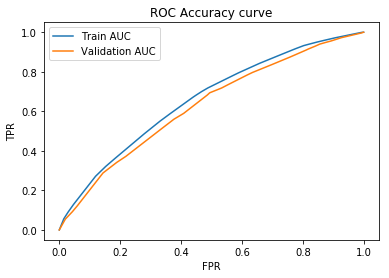

Train AUC = 0.66
Test AUC = 0.63
Wall time: 27.7 s


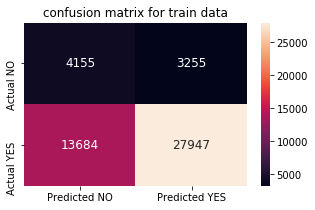

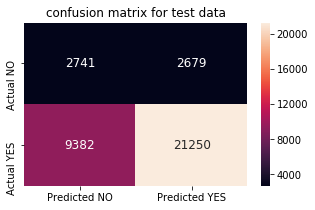

In [93]:
%%time
class_w={0:0.5,1:0.5}
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve, auc
#training model with best lambda(λ) paramter
trained_DT_tfidf_w2v=DecisionTreeClassifier(min_samples_split =100,max_depth=5,class_weight=class_w)
#trainning model
trained_DT_tfidf_w2v.fit(tr_X_tfidf_w2v,Y_train)
# predict the response on the train data
predicted_labels_train=trained_DT_tfidf_w2v.predict_proba(tr_X_tfidf_w2v)
predicted_labels_train_temp=trained_DT_tfidf_w2v.predict(tr_X_tfidf_w2v)
# predict the response on the test data
predicted_labels_test=trained_DT_tfidf_w2v.predict_proba(te_X_tfidf_w2v)
#Calculating FPR and TPR for train and test data
tr_fpr,tr_tpr,tr_threshold=roc_curve(Y_train,predicted_labels_train[:,1])
te_fpr,te_tpr,te_threshold=roc_curve(Y_test,predicted_labels_test[:,1])
#drawing ROC ROC Accuracy curve for test and train data 
plt.plot(tr_fpr,tr_tpr,label="Train AUC")
plt.plot(te_fpr,te_tpr,label="Validation AUC")
plt.title("ROC Accuracy curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()
print("Train AUC =",round(auc(tr_fpr,tr_tpr),2))
print("Test AUC =",round(auc(te_fpr,te_tpr),2))
#drawing confusion matrix for test and train data 
t2="confusion matrix for train data"
draw_confusion_matrix(trained_DT_tfidf_w2v,tr_threshold,Y_train,predicted_labels_train[:,1],tr_tpr,tr_fpr,t2)
t1="confusion matrix for test data"
draw_confusion_matrix(trained_DT_tfidf_w2v,tr_threshold,Y_test,predicted_labels_test[:,1],te_tpr,te_fpr,t1)

C:\Users\nnagari\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

100%|██████████████████████████████████████████████████████████████████████████████| 2323/2323 [02:20<00:00,  5.85it/s]


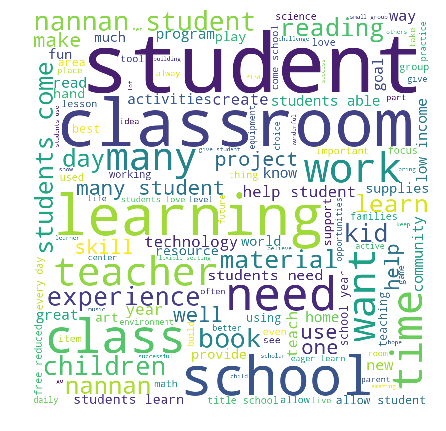

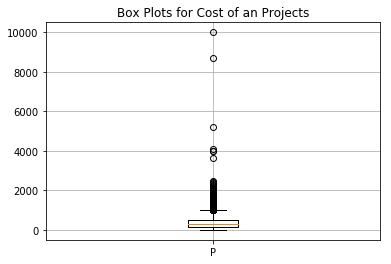

No handles with labels found to put in legend.


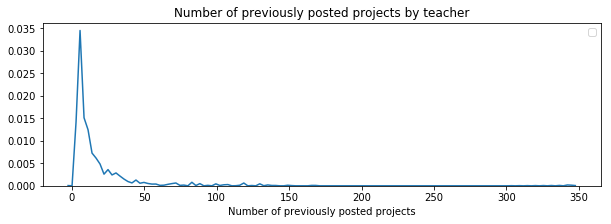

In [89]:
#Y_hat values
y_pred=get_y_pred(trained_DT_tfidf_w2v,tr_threshold,Y_train,predicted_labels_train[:,1],tr_tpr,tr_fpr)
y_pred=pd.Series(y_pred)
#false positive data
FP=get_false_positive(X_train,Y_train,y_pred)
#print Word Cloud
get_word_could(FP['essay'])
#print boxplot
get_boxplot(FP["price"])
#print pdf
get_pdf(FP["teacher_number_of_previously_posted_projects"])

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [108]:
tr_X_new=pd.DataFrame(tr_X_BOW,columns=BOW_features)#storing all the training data with feature name
cv_X_new=pd.DataFrame(cv_X_BOW,columns=BOW_features)#storing all the cv data with feature name
te_X_new=pd.DataFrame(te_X_BOW,columns=BOW_features)#storing all the test data with feature name
DT_feature_importance=DecisionTreeClassifier(max_depth=10,max_features=2,class_weight=class_w,min_samples_split =500)
DT_feature_importance.fit(tr_X_BOW,Y_train)


DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='gini',
            max_depth=10, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
#getting 5K features 
feature_score=[]
feature_impor=np.round(DT_feature_importance.feature_importances_,decimals=6)
for item in feature_impor:
    feature_score.append(item)
feature_data=pd.DataFrame([BOW_features,feature_score])
feature_data=feature_data.T
feature_data.columns=['Feature','feature_score']
feature_data.sort_values('feature_score',ascending=False, inplace=True)
tr_X_new=tr_X_new[feature_data.Feature[0:5000]]
cv_X_new=cv_X_new[feature_data.Feature[0:5000]]
te_X_new=te_X_new[feature_data.Feature[0:5000]]

### 2.4.4 Applying SVM on 5K features,<font color='red'> SET 5</font>


In [89]:
#refered link :https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
def roc_auc_compute_SVM(x_train,y_train,x_test_temp,y_test_temp,C,title):
    n_neighbors=C
    regularization=['l1','l2']
    i=0
    for reg in regularization:
        train_auc_scores=[]
        validation_auc_scores=[]
        train_cv_scores=[]
        validation_cv_scores=[]
        best_cv_auc_scores=0
        for c in n_neighbors:
            class_w={0:0.5,1:0.5}
            parameters = {'alpha':[c]}
            trained_SVM = SGDClassifier(alpha=c,class_weight=class_w,penalty=reg)
            #trainning model
            trained_SVM.fit(x_train,y_train)
            calibrated = CalibratedClassifierCV(trained_SVM, method='isotonic', cv=5)
            calibrated.fit(x_train, y_train)
            # predict the response on the cross validation
            pradicted_labels=calibrated.predict_proba(x_test_temp)
            #Calculating validation auc scores
            validation_auc=roc_auc_score(y_test_temp,pradicted_labels[:,1]) #1-roc_auc_score for validation error
            # predict the response on the train and calculating the train auc
            train_auc=roc_auc_score(y_train,calibrated.predict_proba(x_train)[:,1]) #1-roc_auc_score for train error
        
             # K-flod cross validation
            gs = GridSearchCV(trained_SVM,parameters,cv=3,scoring='roc_auc')
            gs.fit(x_train,y_train)
            train_auc= gs.cv_results_['mean_train_score']
            cv_auc = gs.cv_results_['mean_test_score'] 
        
            train_cv_scores.append(train_auc)
            validation_cv_scores.append(cv_auc)
            train_auc_scores.append(train_auc)
            validation_auc_scores.append(validation_auc)
        
            if cv_auc>=best_cv_auc_scores:
                best_cv_auc_scores=cv_auc
            
        plot_curve(train_auc_scores,validation_auc_scores,n_neighbors,title[i])
        i=i+1
        plot_curve(train_cv_scores,validation_cv_scores,n_neighbors,title[i])
        print("best AUC",best_cv_auc_scores)
        print("best Alpha(α)",C[validation_cv_scores.index(best_cv_auc_scores)])
        i=i+1

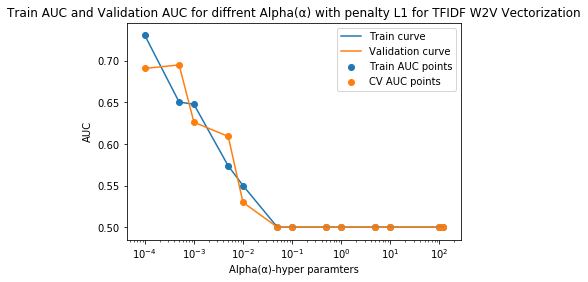

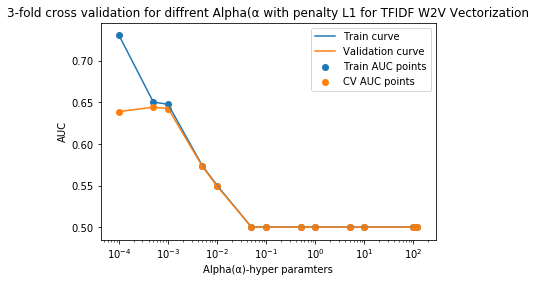

best AUC [0.64425223]
best Alpha(α) 0.0005


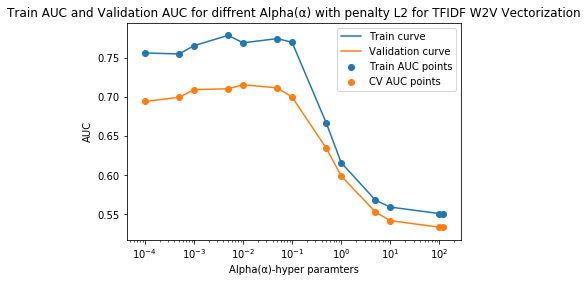

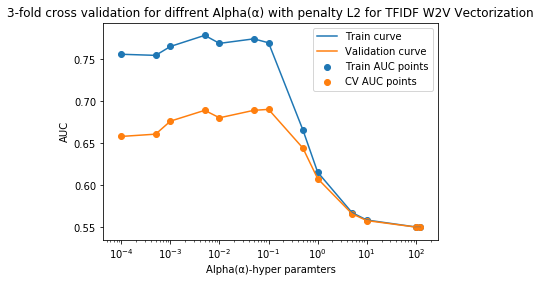

best AUC [0.69037262]
best Alpha(α) 0.1
Wall time: 32min 41s


In [90]:
%%time
title=["Train AUC and Validation AUC for diffrent Alpha(α) with penalty L1 for TFIDF W2V Vectorization","3-fold cross validation for diffrent Alpha(α with penalty L1 for TFIDF W2V Vectorization","Train AUC and Validation AUC for diffrent Alpha(α) with penalty L2 for TFIDF W2V Vectorization","3-fold cross validation for diffrent Alpha(α) with penalty L2 for TFIDF W2V Vectorization"]
roc_auc_compute_SVM(tr_X_new,Y_train,cv_X_new,Y_cv,[120,100,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],title)

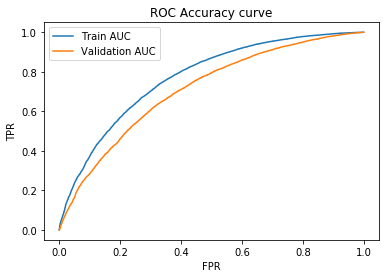

Train AUC = 0.77
Test AUC = 0.71
Wall time: 23.2 s


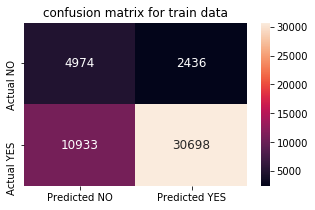

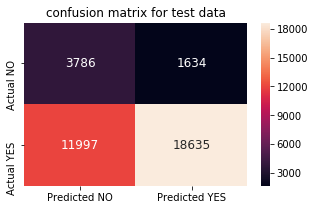

In [91]:
%%time
class_w={0:0.5,1:0.5}
#https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.metrics import roc_curve, auc
#training model with best lambda(λ) paramter
trained_SVM_new=SGDClassifier(alpha=0.1,class_weight=class_w,penalty='l2')
#trainning model
trained_SVM_new.fit(tr_X_new,Y_train)
calibrated = CalibratedClassifierCV(trained_SVM_new, method='isotonic')
calibrated.fit(tr_X_new, Y_train)
# predict the response on the train data
predicted_labels_train=calibrated.predict_proba(tr_X_new)
# predict the response on the test data
predicted_labels_test=calibrated.predict_proba(te_X_new)
#Calculating FPR and TPR for train and test data
tr_fpr,tr_tpr,tr_threshold=roc_curve(Y_train,predicted_labels_train[:,1])
te_fpr,te_tpr,te_threshold=roc_curve(Y_test,predicted_labels_test[:,1])
#drawing ROC ROC Accuracy curve for test and train data 
plt.plot(tr_fpr,tr_tpr,label="Train AUC")
plt.plot(te_fpr,te_tpr,label="Validation AUC")
plt.title("ROC Accuracy curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()
print("Train AUC =",round(auc(tr_fpr,tr_tpr),2))
print("Test AUC =",round(auc(te_fpr,te_tpr),2))
#drawing confusion matrix for test and train data 
t2="confusion matrix for train data"
draw_confusion_matrix(calibrated,tr_threshold,Y_train,predicted_labels_train[:,1],tr_tpr,tr_fpr,t2)
t1="confusion matrix for test data"
draw_confusion_matrix(calibrated,tr_threshold,Y_test,predicted_labels_test[:,1],te_tpr,te_fpr,t1)

<h1>3. Conclusions</h1>

In [24]:
from prettytable import PrettyTable
print("Decision Tree")    
table = PrettyTable()

table.field_names = ["Vectorizer",  "Max Depth","Mini_spit", "Test AUC"]

table.add_row(["BOW",  "10","500","0.65" ])
table.add_row(["TFIDF", "10","500", "0.64"])
table.add_row(["AVG W2V",  "5","5","0.63" ])
table.add_row(["TFIDF W2V",  "100","5","0.63" ])
print(table)

Decision Tree
+------------+-----------+-----------+----------+
| Vectorizer | Max Depth | Mini_spit | Test AUC |
+------------+-----------+-----------+----------+
|    BOW     |     10    |    500    |   0.65   |
|   TFIDF    |     10    |    500    |   0.64   |
|  AVG W2V   |     5     |     5     |   0.63   |
| TFIDF W2V  |    100    |     5     |   0.63   |
+------------+-----------+-----------+----------+


In [98]:
print("SVM") 

table = PrettyTable()
table.field_names = ["Vectorizer",  " Alpha(α)","penalty", "Test AUC"]
table.add_row(["5K features of set 1",  "0.1","L2","0.71" ])
print(table)

SVM
+----------------------+-----------+---------+----------+
|      Vectorizer      |  Alpha(α) | penalty | Test AUC |
+----------------------+-----------+---------+----------+
| 5K features of set 1 |    0.1    |    L2   |   0.71   |
+----------------------+-----------+---------+----------+
